In [1]:
import os 
os.environ["OMP_NUM_THREADS"] = "1" 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn import preprocessing

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Geographic Segmentation

In [5]:
df1 = pd.read_excel('data1.xlsx')

In [6]:
df1.head()

,Sl No,State/UT,Total Vehicles Registered,Total Electric Vehicles Registered,Percentage of Electric Vehicles
0,1,Andaman & Nicobar Islands,160375,186,0.12
1,2,Andhra Pradesh,16517516,66500,0.40
2,3,Arunachal Pradesh,299371,25,0.01
3,4,Assam,5393542,116605,2.16
4,5,Bihar,11728184,155457,1.33


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Sl No                               34 non-null     int64  
 1   State/UT                            34 non-null     object 
 2   Total Vehicles Registered           34 non-null     int64  
 3   Total Electric Vehicles Registered  34 non-null     int64  
 4   Percentage of Electric Vehicles     34 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.5+ KB


In [8]:
df1.shape

(34, 5)

In [9]:
df1.isnull().any()

Sl No                                 False
State/UT                              False
Total Vehicles Registered             False
Total Electric Vehicles Registered    False
Percentage of Electric Vehicles       False
dtype: bool

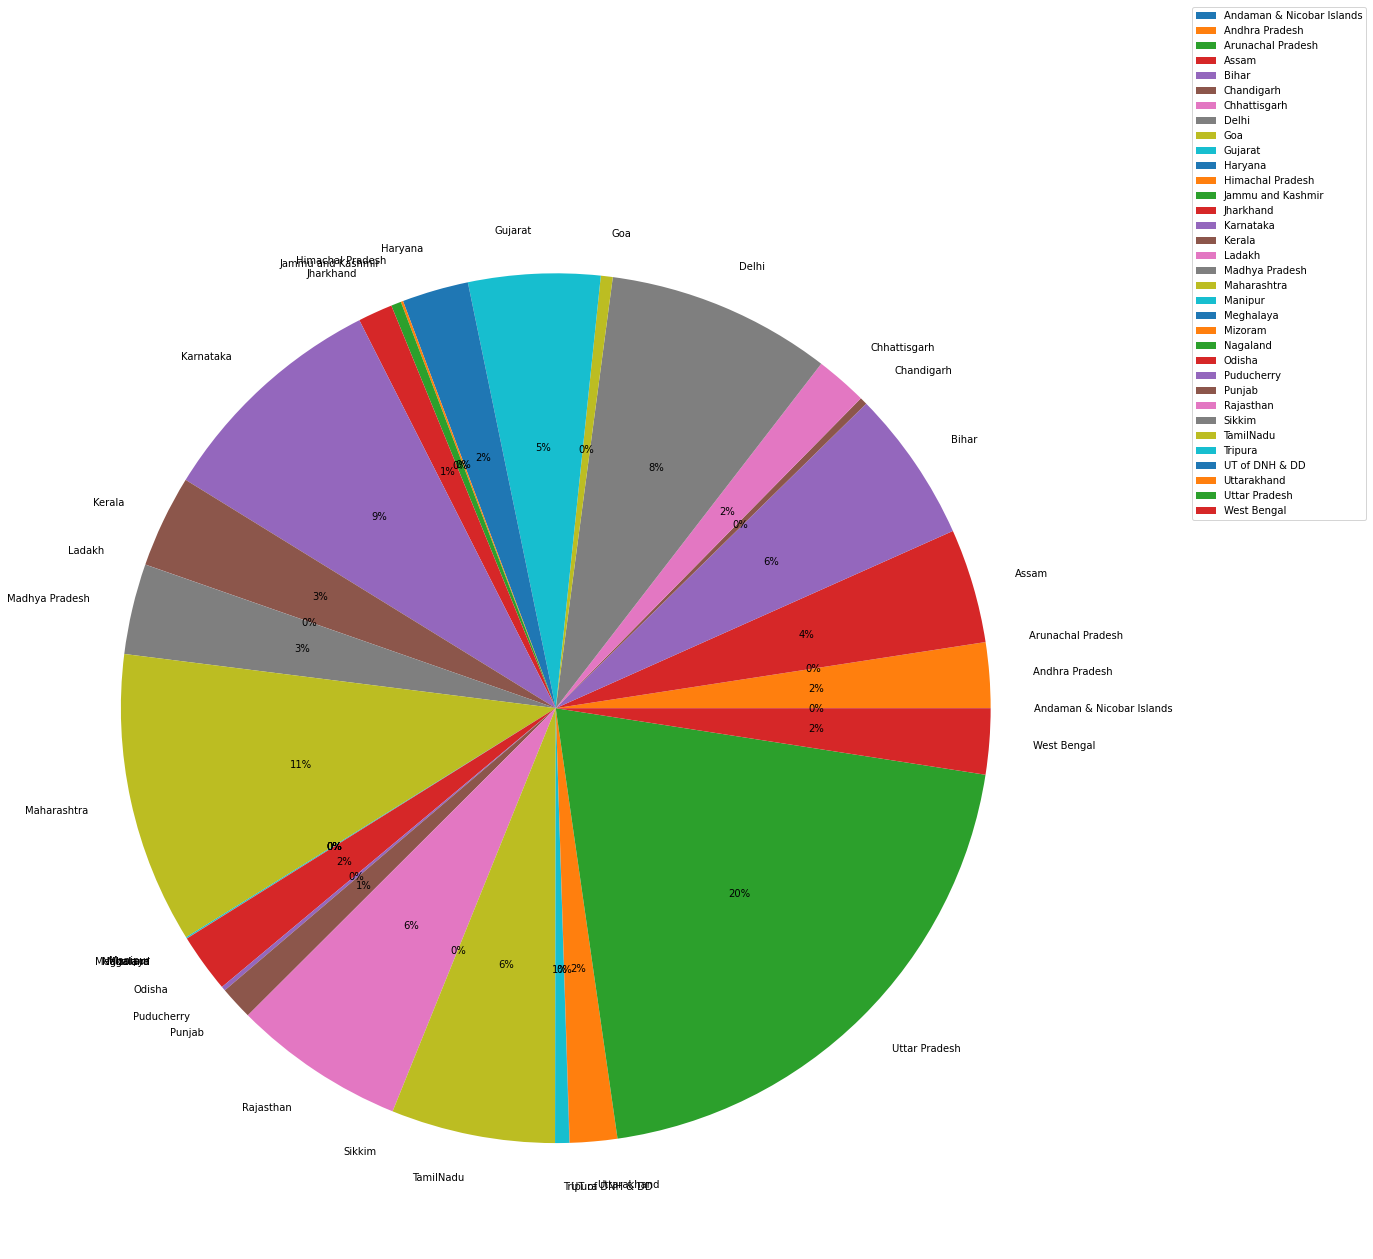

In [10]:
plt.figure(figsize = (20,20))
plt.pie(df1["Total Electric Vehicles Registered"], labels = df1["State/UT"], autopct='%.0f%%')
plt.legend( loc ="upper right", bbox_to_anchor =(1.25, 1.15))
plt.show()

UP, Maharashtra and Karnataka has the highest  number of electric vehicles in the country

In [11]:
df1.sort_values(['Total Electric Vehicles Registered'], ascending=False).head(10)

,Sl No,State/UT,Total Vehicles Registered,Total Electric Vehicles Registered,Percentage of Electric Vehicles
32,33,Uttar Pradesh,43943230,556629,1.27
18,19,Maharashtra,34371551,296885,0.86
14,15,Karnataka,29855843,239948,0.80
7,8,Delhi,8457200,229305,2.71
26,27,Rajasthan,18914170,175595,0.93
28,29,TamilNadu,31643747,167216,0.53
4,5,Bihar,11728184,155457,1.33
9,10,Gujarat,22799866,134273,0.59
3,4,Assam,5393542,116605,2.16
15,16,Kerala,16643512,94346,0.57


## Technographic Segmentation

In [12]:
df2 = pd.read_excel('data2.xlsx')

In [13]:
df2.head()

,Car_name,Car_price,Batter_cap,Drive_range,Power,Charge_time,Transmission,Boot_space,Top_speed
0,MG Comet EV,798000,17.30,230,41.42,7.0,Automatic,350,230
1,Tata Tiago EV,1199000,19.20,250,73.75,6.9,Automatic,240,120
2,Tata Tigor EV,1375000,26.00,315,73.75,7.5,Automatic,316,120
3,MG ZS EV,2740000,50.30,461,174.33,9.0,Automatic,470,175
4,BYD Atto 3,3449000,60.48,521,201.15,10.0,Automatic,440,160


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car_name      30 non-null     object 
 1   Car_price     30 non-null     int64  
 2   Batter_cap    30 non-null     float64
 3   Drive_range   30 non-null     int64  
 4   Power         30 non-null     float64
 5   Charge_time   30 non-null     float64
 6   Transmission  30 non-null     object 
 7   Boot_space    30 non-null     int64  
 8   Top_speed     30 non-null     int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 2.2+ KB


In [15]:
df2.shape

(30, 9)

In [16]:
df2.isnull().any()

Car_name        False
Car_price       False
Batter_cap      False
Drive_range     False
Power           False
Charge_time     False
Transmission    False
Boot_space      False
Top_speed       False
dtype: bool

In [19]:
CarPriceGroup={}
length=df2.shape[0]
CarPriceGroup['100000-2000000']=round(df2[(df2['Car_price']>=100000)&(df2['Car_price']<2000000)].shape[0]*100/length,2)
CarPriceGroup['2000000-4000000']=round(df2[(df2['Car_price']>= 2000000)&(df2['Car_price']< 4000000)].shape[0]*100/length,2)
CarPriceGroup['4000000-6000000']=round(df2[(df2['Car_price']>= 4000000)&(df2['Car_price']< 6000000)].shape[0]*100/length,2)
CarPriceGroup['6000000-8000000']=round(df2[(df2['Car_price']>= 6000000)&(df2['Car_price']< 8000000)].shape[0]*100/length,2)
CarPriceGroup['8000000-10000000']=round(df2[(df2['Car_price']>= 8000000)&(df2['Car_price']<10000000)].shape[0]*100/length,2)
CarPriceGroup['10000000-30000000']=round(df2[(df2['Car_price']>=10000000)&(df2['Car_price']<30000000)].shape[0]*100/length,2)


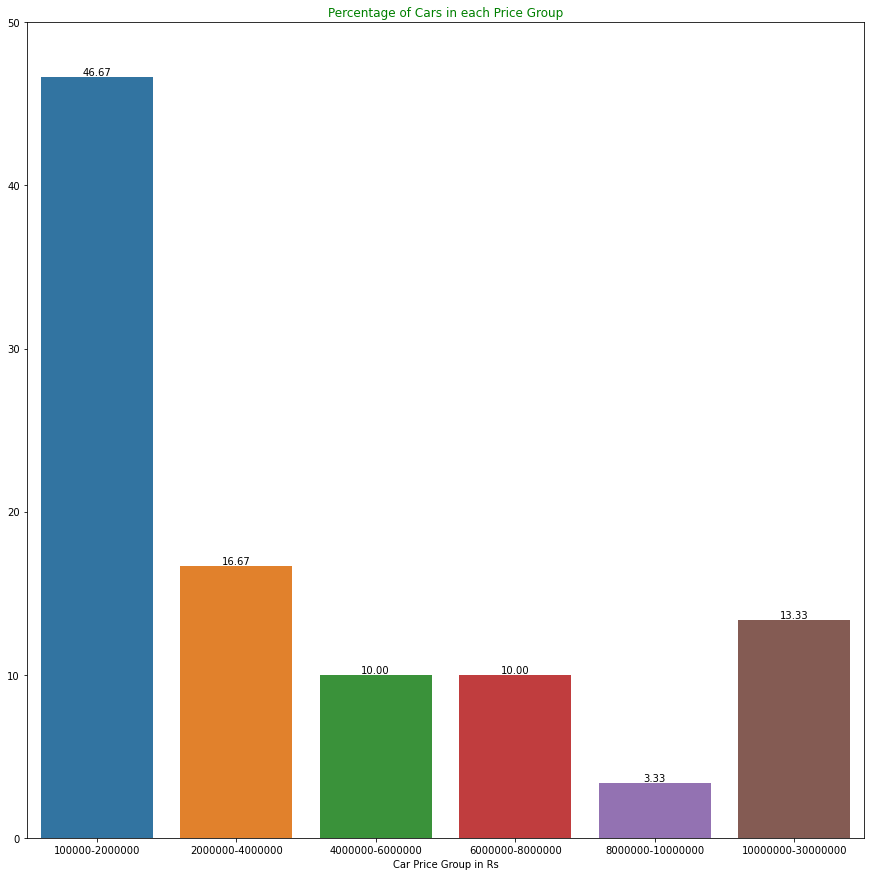

In [20]:
fig,ax=plt.subplots(figsize=(15,15))
plots=sns.barplot(x = list(CarPriceGroup.keys()), y = list(CarPriceGroup.values()))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
ax.set_ylim(0,50)
plt.title('Percentage of Cars in each Price Group', color='green')
plt.xlabel('Car Price Group in Rs', color='black',)
plt.show()

In [21]:
BatteryCapacityGroup={}
length=df2.shape[0]
BatteryCapacityGroup['0-20']=round(df2[(df2['Batter_cap']>=0)&(df2['Batter_cap']<20)].shape[0]*100/length,2)
BatteryCapacityGroup['20-40']=round(df2[(df2['Batter_cap']>= 20)&(df2['Batter_cap']< 40)].shape[0]*100/length,2)
BatteryCapacityGroup['40-60']=round(df2[(df2['Batter_cap']>= 40)&(df2['Batter_cap']< 60)].shape[0]*100/length,2)
BatteryCapacityGroup['60-80']=round(df2[(df2['Batter_cap']>= 60)&(df2['Batter_cap']< 80)].shape[0]*100/length,2)
BatteryCapacityGroup['80-100']=round(df2[(df2['Batter_cap']>= 80)&(df2['Batter_cap']<100)].shape[0]*100/length,2)
BatteryCapacityGroup['100-120']=round(df2[(df2['Batter_cap']>=100)&(df2['Batter_cap']<120)].shape[0]*100/length,2)


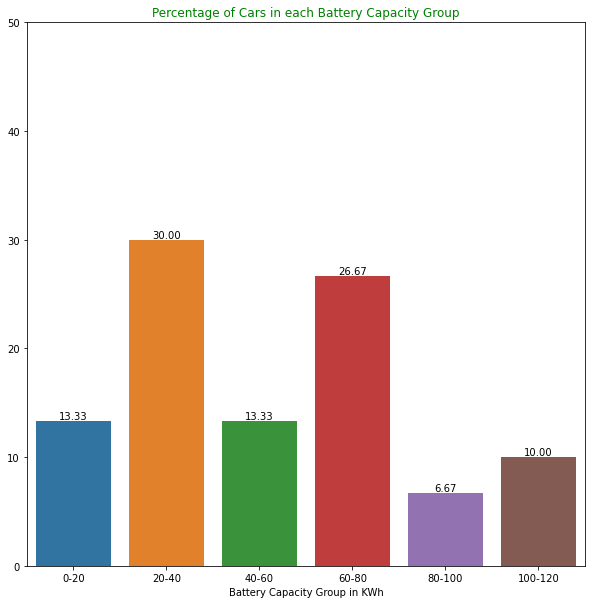

In [22]:
fig,ax=plt.subplots(figsize=(10,10))
plots=sns.barplot(x = list(BatteryCapacityGroup.keys()), y = list(BatteryCapacityGroup.values()))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
ax.set_ylim(0,50)
plt.title('Percentage of Cars in each Battery Capacity Group', color='green')
plt.xlabel('Battery Capacity Group in KWh', color='black',)
plt.show()

In [23]:
DriveRangeGroup={}
length=df2.shape[0]
DriveRangeGroup['200-300']=round(df2[(df2['Drive_range']>=200)&(df2['Drive_range']<300)].shape[0]*100/length,2)
DriveRangeGroup['300-400']=round(df2[(df2['Drive_range']>= 300)&(df2['Drive_range']< 400)].shape[0]*100/length,2)
DriveRangeGroup['400-500']=round(df2[(df2['Drive_range']>= 400)&(df2['Drive_range']< 500)].shape[0]*100/length,2)
DriveRangeGroup['500-600']=round(df2[(df2['Drive_range']>= 500)&(df2['Drive_range']< 600)].shape[0]*100/length,2)
DriveRangeGroup['600-700']=round(df2[(df2['Drive_range']>= 600)&(df2['Drive_range']<700)].shape[0]*100/length,2)
DriveRangeGroup['700-800']=round(df2[(df2['Drive_range']>=700)&(df2['Drive_range']<800)].shape[0]*100/length,2)
DriveRangeGroup['800-900']=round(df2[(df2['Drive_range']>=800)&(df2['Drive_range']<900)].shape[0]*100/length,2)

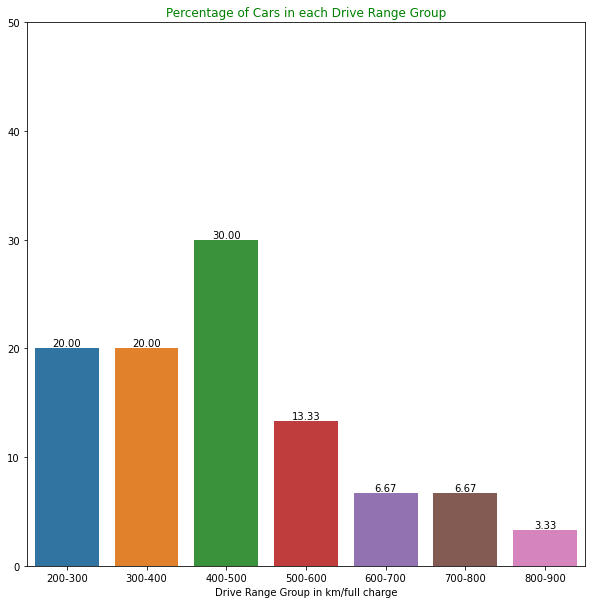

In [24]:
fig,ax=plt.subplots(figsize=(10,10))
plots=sns.barplot(x = list(DriveRangeGroup.keys()), y = list(DriveRangeGroup.values()))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
ax.set_ylim(0,50)
plt.title('Percentage of Cars in each Drive Range Group', color='green')
plt.xlabel('Drive Range Group in km/full charge', color='black',)
plt.show()

In [25]:
PowerGroup={}
length=df2.shape[0]
PowerGroup['200-300']=round(df2[(df2['Power']>=200)&(df2['Power']<300)].shape[0]*100/length,2)
PowerGroup['300-400']=round(df2[(df2['Power']>= 300)&(df2['Power']< 400)].shape[0]*100/length,2)
PowerGroup['400-500']=round(df2[(df2['Power']>= 400)&(df2['Power']< 500)].shape[0]*100/length,2)
PowerGroup['500-600']=round(df2[(df2['Power']>= 500)&(df2['Power']< 600)].shape[0]*100/length,2)
PowerGroup['600-700']=round(df2[(df2['Power']>= 600)&(df2['Power']<700)].shape[0]*100/length,2)
PowerGroup['700-800']=round(df2[(df2['Power']>=700)&(df2['Power']<800)].shape[0]*100/length,2)

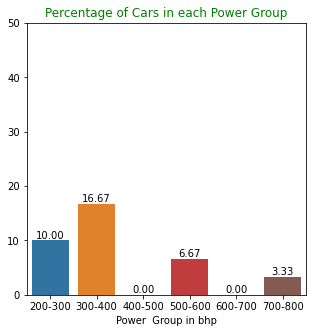

In [26]:
fig,ax=plt.subplots(figsize=(5,5))
plots=sns.barplot(x = list(PowerGroup.keys()), y = list(PowerGroup.values()))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
ax.set_ylim(0,50)
plt.title('Percentage of Cars in each Power Group', color='green')
plt.xlabel('Power  Group in bhp', color='black',)
plt.show()

In [27]:
ChargeTimeGroup={}
length=df2.shape[0]
ChargeTimeGroup['0-2']=round(df2[(df2['Charge_time']>=0)&(df2['Charge_time']<2)].shape[0]*100/length,2)
ChargeTimeGroup['2-4']=round(df2[(df2['Charge_time']>= 2)&(df2['Charge_time']< 4)].shape[0]*100/length,2)
ChargeTimeGroup['4-6']=round(df2[(df2['Charge_time']>= 4)&(df2['Charge_time']< 6)].shape[0]*100/length,2)
ChargeTimeGroup['6-8']=round(df2[(df2['Charge_time']>= 6)&(df2['Charge_time']< 8)].shape[0]*100/length,2)
ChargeTimeGroup['8-10']=round(df2[(df2['Charge_time']>= 8)&(df2['Charge_time']<10)].shape[0]*100/length,2)
ChargeTimeGroup['10-12']=round(df2[(df2['Charge_time']>=10)&(df2['Charge_time']<12)].shape[0]*100/length,2)
ChargeTimeGroup['12-14']=round(df2[(df2['Charge_time']>=12)&(df2['Charge_time']<14)].shape[0]*100/length,2)
ChargeTimeGroup['14-16']=round(df2[(df2['Charge_time']>=14)&(df2['Charge_time']<16)].shape[0]*100/length,2)

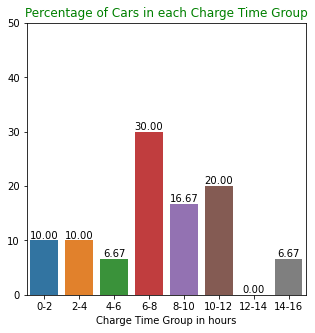

In [28]:
fig,ax=plt.subplots(figsize=(5,5))
plots=sns.barplot(x = list(ChargeTimeGroup.keys()), y = list(ChargeTimeGroup.values()))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
ax.set_ylim(0,50)
plt.title('Percentage of Cars in each Charge Time Group', color='green')
plt.xlabel('Charge Time Group in hours', color='black',)
plt.show()

In [29]:
BootSpaceGroup={}
length=df2.shape[0]
BootSpaceGroup['0-100']=round(df2[(df2['Boot_space']>=0)&(df2['Boot_space']<100)].shape[0]*100/length,2)
BootSpaceGroup['100-200']=round(df2[(df2['Boot_space']>= 100)&(df2['Boot_space']< 200)].shape[0]*100/length,2)
BootSpaceGroup['200-300']=round(df2[(df2['Boot_space']>= 200)&(df2['Boot_space']< 300)].shape[0]*100/length,2)
BootSpaceGroup['300-400']=round(df2[(df2['Boot_space']>= 300)&(df2['Boot_space']< 400)].shape[0]*100/length,2)
BootSpaceGroup['400-500']=round(df2[(df2['Boot_space']>= 400)&(df2['Boot_space']<500)].shape[0]*100/length,2)
BootSpaceGroup['500-600']=round(df2[(df2['Boot_space']>=500)&(df2['Boot_space']<600)].shape[0]*100/length,2)
BootSpaceGroup['600-700']=round(df2[(df2['Boot_space']>=600)&(df2['Boot_space']<700)].shape[0]*100/length,2)


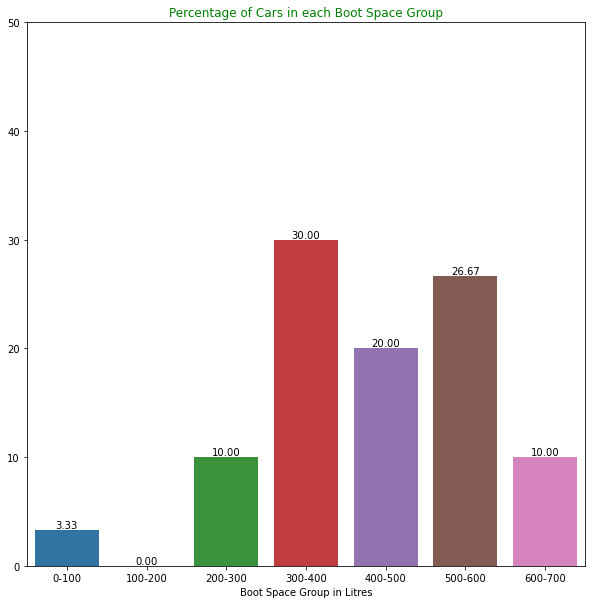

In [30]:
fig,ax=plt.subplots(figsize=(10,10))
plots=sns.barplot(x = list(BootSpaceGroup.keys()), y = list(BootSpaceGroup.values()))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
ax.set_ylim(0,50)
plt.title('Percentage of Cars in each Boot Space Group', color='green')
plt.xlabel('Boot Space Group in Litres', color='black',)
plt.show()

In [31]:
TopSpeedGroup={}
length=df2.shape[0]

TopSpeedGroup['50-100']=round(df2[(df2['Top_speed']>= 50)&(df2['Top_speed']< 100)].shape[0]*100/length,2)
TopSpeedGroup['100-150']=round(df2[(df2['Top_speed']>= 100)&(df2['Top_speed']< 150)].shape[0]*100/length,2)
TopSpeedGroup['150-200']=round(df2[(df2['Top_speed']>= 150)&(df2['Top_speed']< 200)].shape[0]*100/length,2)
TopSpeedGroup['200-250']=round(df2[(df2['Top_speed']>= 200)&(df2['Top_speed']<250)].shape[0]*100/length,2)
TopSpeedGroup['250-300']=round(df2[(df2['Top_speed']>= 250)&(df2['Top_speed']<300)].shape[0]*100/length,2)

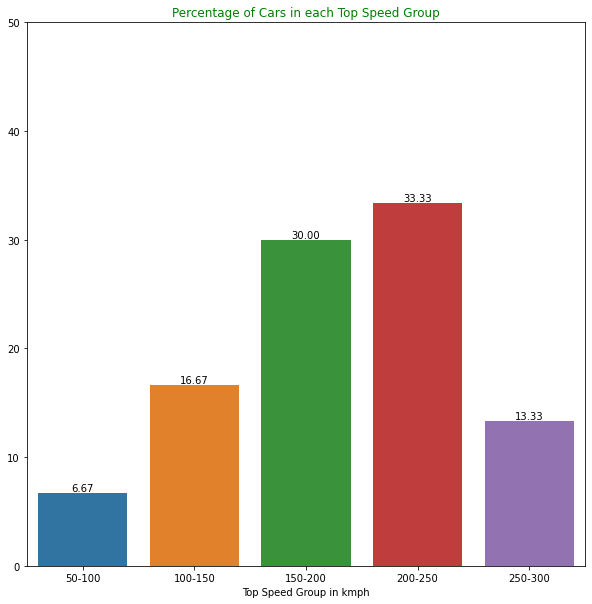

In [32]:
fig,ax=plt.subplots(figsize=(10,10))
plots=sns.barplot(x = list(TopSpeedGroup.keys()), y = list(TopSpeedGroup.values()))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
ax.set_ylim(0,50)
plt.title('Percentage of Cars in each Top Speed Group', color='green')
plt.xlabel('Top Speed Group in kmph', color='black',)
plt.show()

In [33]:
X = df2
X.drop(columns=['Car_name', 'Transmission'], inplace=True)
X.head()

,Car_price,Batter_cap,Drive_range,Power,Charge_time,Boot_space,Top_speed
0,798000,17.30,230,41.42,7.0,350,230
1,1199000,19.20,250,73.75,6.9,240,120
2,1375000,26.00,315,73.75,7.5,316,120
3,2740000,50.30,461,174.33,9.0,470,175
4,3449000,60.48,521,201.15,10.0,440,160


In [34]:
pca_data = preprocessing.scale(X)
pca = PCA(n_components=7)
pc = pca.fit_transform(X)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7']
pf = pd.DataFrame(data=pc,columns=names)

n_components must be between 0 and min(n_samples, n_features)=7

In [35]:
pca.explained_variance_ratio_

array([9.99999998e-01, 1.66925840e-09, 4.86878351e-10, 1.66165977e-10,
       6.20212024e-11, 5.53230606e-12, 3.84621464e-13])

In [36]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = X.columns.values
loadings_df = loadings_df.set_index('variable')

In [37]:
wcss=[]
for i in range(1,6):
    #preventing random initialization: 'init=k-means++'
    kmeans= KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

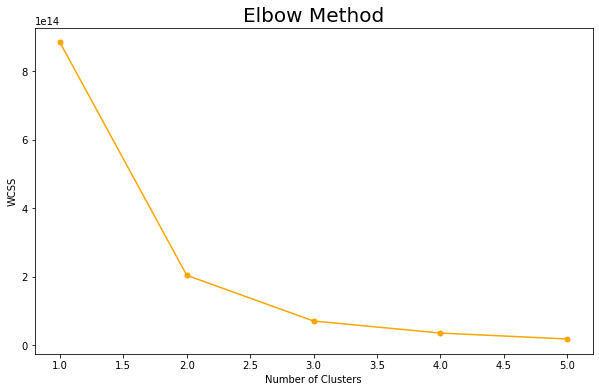

In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(1,6),wcss,color='orange', linestyle='solid', marker='o',
          markersize=5)
plt.title('Elbow Method', size=20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## Number of clusters = 3

In [39]:
kmeans3 = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans3.fit(X)
X['cluster'] = kmeans3.labels_
print(kmeans3.cluster_centers_)

[[1.63785000e+06 4.86830000e+01 4.29600000e+02 1.66194000e+02
  7.39300000e+00 4.21550000e+02 1.69900000e+02]
 [1.83333333e+07 5.33666667e+01 4.42333333e+02 2.48083333e+02
  7.55333333e+00 3.81666667e+02 2.48333333e+02]
 [7.81214286e+06 6.62285714e+01 4.73142857e+02 2.84872857e+02
  6.85714286e+00 4.18714286e+02 1.95714286e+02]]


In [40]:
# Cluster size for the 3 clusters
from collections import Counter
Counter(kmeans3.labels_)

Counter({0: 20, 1: 3, 2: 7})

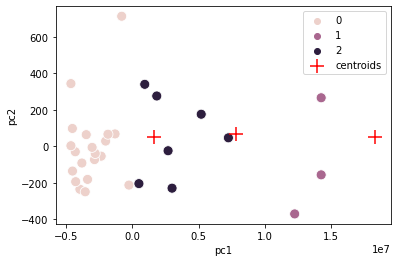

In [41]:
# Visulazing clusters
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans3.labels_,s = 100)
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], 
          marker="+", c="r", s=200, label="centroids")
plt.legend()
plt.show()

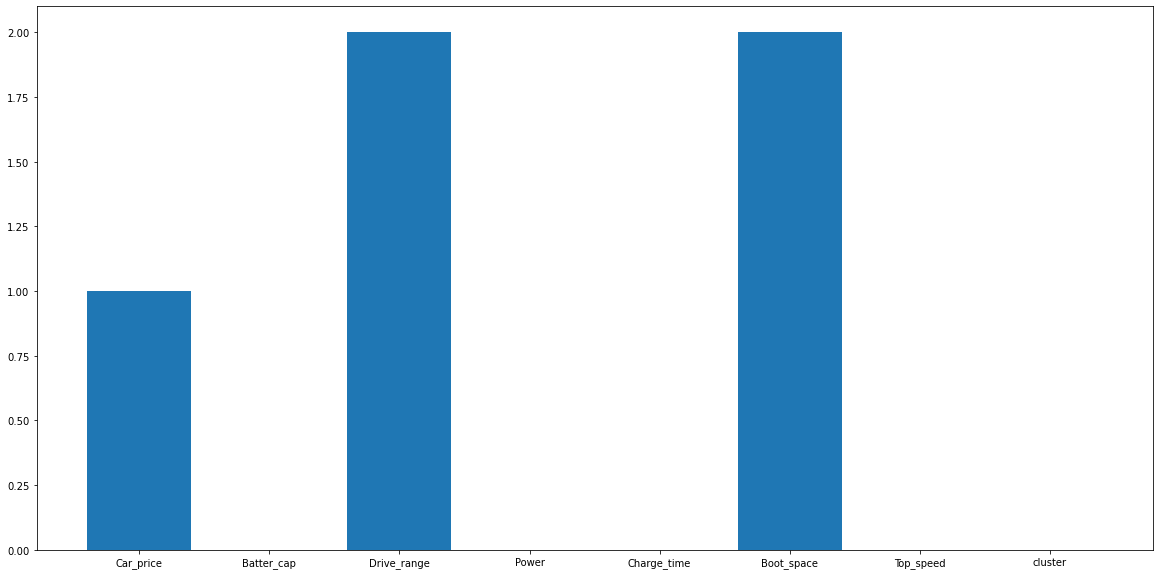

In [42]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy as shc
from sklearn.metrics import pairwise_distances
clust2 = AgglomerativeClustering(n_clusters = 3).fit_predict(pairwise_distances(X.transpose()))
plt.figure(figsize = (20,10))
plt.bar(X.columns,clust2)
plt.show()

From this bar graph we have 3 segments:                                                                                      
Segment0 = Batter_Cap, Power, Charge_time, Top_speed                                                                                                
Segment1 = Car_price                                                                                                             
Segment 2 =Drive Range, Boot Space 


Drive Range, Boot Space forms the major contributor in Purchasing Car.

In [43]:
df2

,Car_price,Batter_cap,Drive_range,Power,Charge_time,Boot_space,Top_speed,cluster
0,798000,17.30,230,41.42,7.00,350,230,0
1,1199000,19.20,250,73.75,6.90,240,120,0
2,1375000,26.00,315,73.75,7.50,316,120,0
3,2740000,50.30,461,174.33,9.00,470,175,0
4,3449000,60.48,521,201.15,10.00,440,160,0
5,2403000,39.20,452,134.10,6.16,332,167,0
6,1899000,34.50,375,147.51,0.80,378,150,0
7,1954000,40.50,453,141.04,15.00,350,140,0
8,240000,17.30,230,41.42,7.00,610,210,0
9,17000000,19.20,250,73.75,8.50,240,245,1


In [45]:
newdf = df2.groupby('cluster')

In [46]:
cluster0 = newdf.get_group(0)

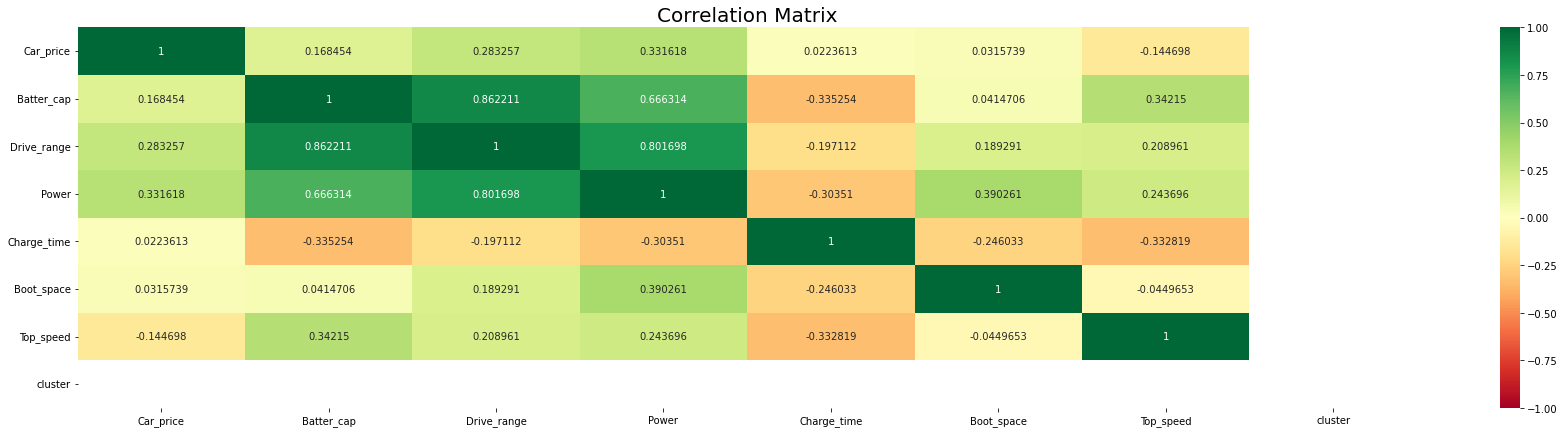

In [47]:
# Correlation Matrix Plotting
plt.figure(figsize=(30,7)) 
plt.title("Correlation Matrix", fontsize=20)
sns.heatmap(cluster0.corr(),cmap='RdYlGn',annot=True,vmax=1.0,vmin=-1.0,fmt='g')  
#cmap is the color for heatmap, annot=True is to show the correlation matrix value on heatmap
#vmax and vmin are the threshold for the heatmap and fmt will create a scale
plt.show()

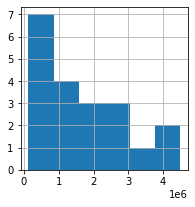

In [48]:
plt.figure(figsize=(3, 3))
hist = cluster0['Car_price'].hist(bins=6) 
plt.show()

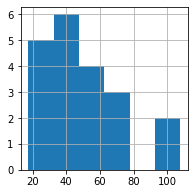

In [49]:
plt.figure(figsize=(3, 3))
hist = cluster0['Batter_cap'].hist(bins=6) 
plt.show()

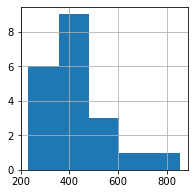

In [50]:
plt.figure(figsize=(3, 3))
hist = cluster0['Drive_range'].hist(bins=5) 
plt.show()

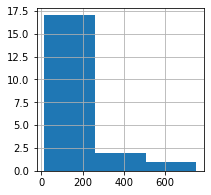

In [51]:
plt.figure(figsize=(3, 3))
hist = cluster0['Power'].hist(bins=3) 
plt.show()

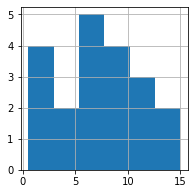

In [52]:
plt.figure(figsize=(3, 3))
hist = cluster0['Charge_time'].hist(bins=6) 
plt.show()

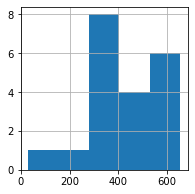

In [53]:
plt.figure(figsize=(3, 3))
hist = cluster0['Boot_space'].hist(bins=5) 
plt.show()

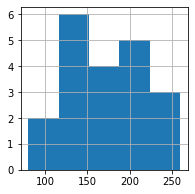

In [54]:
plt.figure(figsize=(3, 3))
hist = cluster0['Top_speed'].hist(bins=5) 
plt.show()

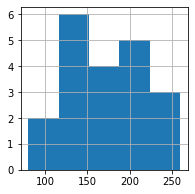

In [55]:
plt.figure(figsize=(3, 3))
hist = cluster0['Top_speed'].hist(bins=5) 
plt.show()

## Demographic Segmentation

In [56]:
df3 = pd.read_csv('data3.csv')

In [57]:
df3.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [58]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [59]:
df3.shape

(99, 13)

In [60]:
df3.isnull().any()

Age                 False
Profession          False
Marrital Status     False
Education           False
No of Dependents    False
Personal loan       False
House Loan          False
Wife Working        False
Salary              False
Wife Salary         False
Total Salary        False
Make                False
Price               False
dtype: bool

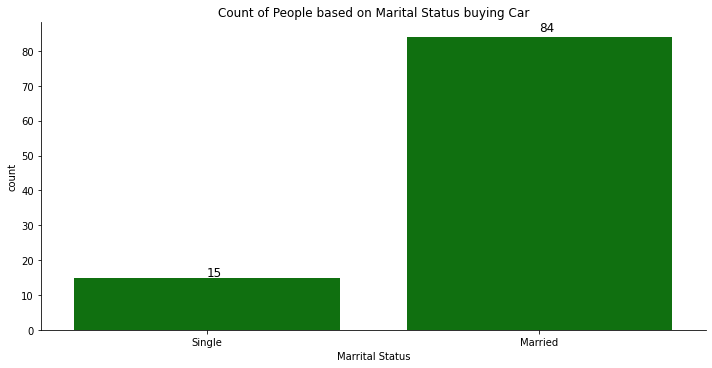

In [61]:
g = sns.catplot(x = "Marrital Status", data=df3, aspect=2, kind="count", color='green')


ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height() * 1.02, 
            format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
plt.title('Count of People based on Marital Status buying Car', color='black')
plt.show()

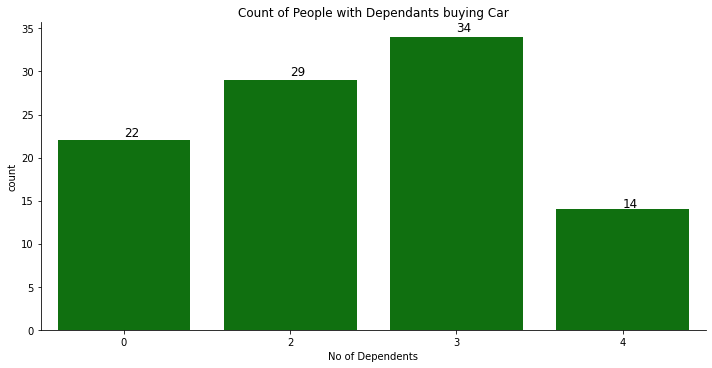

In [62]:
g = sns.catplot(x = "No of Dependents", data=df3, aspect=2, kind="count", color='green')


ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height() * 1.02, 
            format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
plt.title('Count of People with Dependants buying Car', color='black')
plt.show()

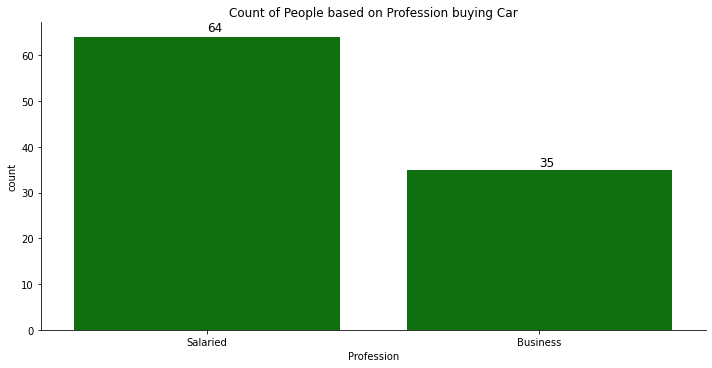

In [63]:
g = sns.catplot(x = "Profession", data=df3, aspect=2, kind="count", color='green')


ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height() * 1.02, 
            format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
plt.title('Count of People based on Profession buying Car', color='black')
plt.show()

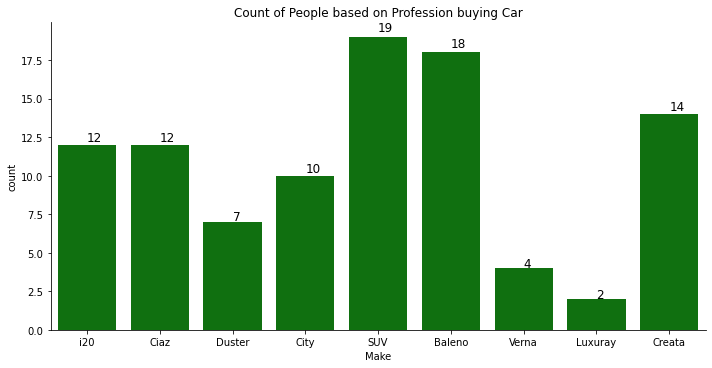

In [118]:
g = sns.catplot(x = "Make", data=df3, aspect=2, kind="count", color='green')


ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height() * 1.02, 
            format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
plt.title('Count of People based on Profession buying Car', color='black')
plt.show()

In [64]:
SalaryGroup={}
length=df3.shape[0]
SalaryGroup['0-5lakh']=round(df3[(df3['Total Salary']>=100000)&(df3['Total Salary']<500000)].shape[0]*100/length,2)
SalaryGroup['5-15lakh']=round(df3[(df3['Total Salary']>=500000)&(df3['Total Salary']<1500000)].shape[0]*100/length,2)
SalaryGroup['15-25lakh']=round(df3[(df3['Total Salary']>=1500000)&(df3['Total Salary']<2500000)].shape[0]*100/length,2)
SalaryGroup['25-35lakh']=round(df3[(df3['Total Salary']>=2500000)&(df3['Total Salary']<3500000)].shape[0]*100/length,2)
SalaryGroup['35-45lakh']=round(df3[(df3['Total Salary']>=3500000)&(df3['Total Salary']<4500000)].shape[0]*100/length,2)
SalaryGroup['45-55lakh']=round(df3[(df3['Total Salary']>=4500000)&(df3['Total Salary']<5500000)].shape[0]*100/length,2)

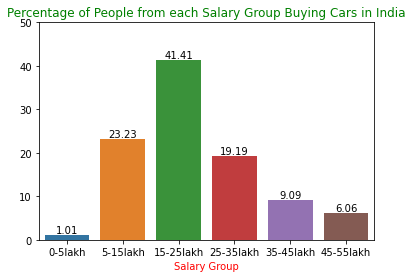

In [65]:
fig,ax=plt.subplots()
plots=sns.barplot(x = list(SalaryGroup.keys()), y = list(SalaryGroup.values()))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
ax.set_ylim(0,50)
plt.title('Percentage of People from each Salary Group Buying Cars in India', color='green')
plt.xlabel('Salary Group', color='red',)
plt.show()

In [66]:
AgeGroup={}
length=df3.shape[0]
AgeGroup['25-30']=round(df3[(df3['Age']>=25)&(df3['Age']<30)].shape[0]*100/length,2)
AgeGroup['30-35']=round(df3[(df3['Age']>=30)&(df3['Age']<35)].shape[0]*100/length,2)
AgeGroup['35-40']=round(df3[(df3['Age']>=35)&(df3['Age']<40)].shape[0]*100/length,2)
AgeGroup['40-45']=round(df3[(df3['Age']>=40)&(df3['Age']<45)].shape[0]*100/length,2)
AgeGroup['45-50']=round(df3[(df3['Age']>=45)&(df3['Age']<50)].shape[0]*100/length,2)
AgeGroup['50-55']=round(df3[(df3['Age']>=50)&(df3['Age']<55)].shape[0]*100/length,2)

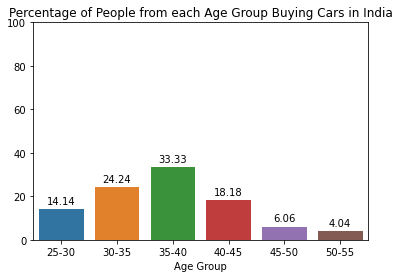

In [67]:
fig,ax=plt.subplots()
plots=sns.barplot(x=list(AgeGroup.keys()),y=list(AgeGroup.values()))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
ax.set_ylim(0,100)
plt.title('Percentage of People from each Age Group Buying Cars in India')
plt.xlabel('Age Group')
plt.show()

In [68]:
WomenSalaryGroup={}
length=df3.shape[0]
WomenSalaryGroup['Salaried'] = round(df3[(df3['Wife Salary']>0)].shape[0]*100/length,2)
WomenSalaryGroup['Not Salaried'] = round(df3[(df3['Wife Salary'] == 0)].shape[0]*100/length,2)

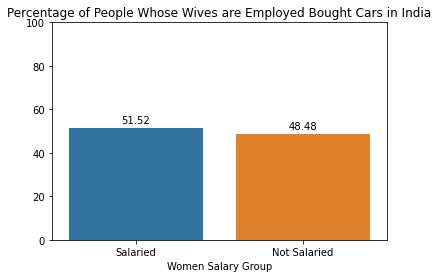

In [69]:
fig,ax=plt.subplots()
plots=sns.barplot(x=list(WomenSalaryGroup.keys()),y=list(WomenSalaryGroup.values()))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
ax.set_ylim(0,100)
plt.title('Percentage of People Whose Wives are Employed Bought Cars in India')
plt.xlabel('Women Salary Group')
plt.show()

## Segmentation using K-Means Clustering

In [70]:
df3['Wife Working'].value_counts()

Yes    52
No     46
m       1
Name: Wife Working, dtype: int64

In [71]:
df3.drop(df3[df3['Wife Working'] == 'm'].index, inplace=True) 

In [72]:
df3.shape

(98, 13)

In [73]:
numerical =  df3.select_dtypes(include=['float64', 'int64'])

In [74]:
label_encoder = preprocessing.LabelEncoder()
categorical = df3.select_dtypes(include = ["object"])
for cols in categorical:
    # Encode labels in column .
    categorical[cols]= label_encoder.fit_transform(categorical[cols])
    categorical[cols].unique()

C:\Users\gknts\AppData\Local\Temp/ipykernel_17380/3467582670.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[cols]= label_encoder.fit_transform(categorical[cols])


In [75]:
# categorical

In [76]:
X = pd.concat([numerical, categorical], axis=1)

In [77]:
X.dtypes

Age                 int64
No of Dependents    int64
Salary              int64
Wife Salary         int64
Total Salary        int64
Price               int64
Profession          int32
Marrital Status     int32
Education           int32
Personal loan       int32
House Loan          int32
Wife Working        int32
Make                int32
dtype: object

In [78]:
pca_data = preprocessing.scale(X)
pca = PCA(n_components=12)
pc = pca.fit_transform(X)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12']
pf = pd.DataFrame(data=pc,columns=names)

In [79]:
pca.explained_variance_ratio_

array([8.32790708e-01, 1.27233463e-01, 3.99758288e-02, 1.07823620e-11,
       3.17409564e-12, 5.70074903e-13, 1.26308754e-13, 1.25460230e-13,
       8.59301321e-14, 4.84410030e-14, 3.05387680e-14, 1.53509961e-14])

In [80]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = X.columns.values
loadings_df = loadings_df.set_index('variable')

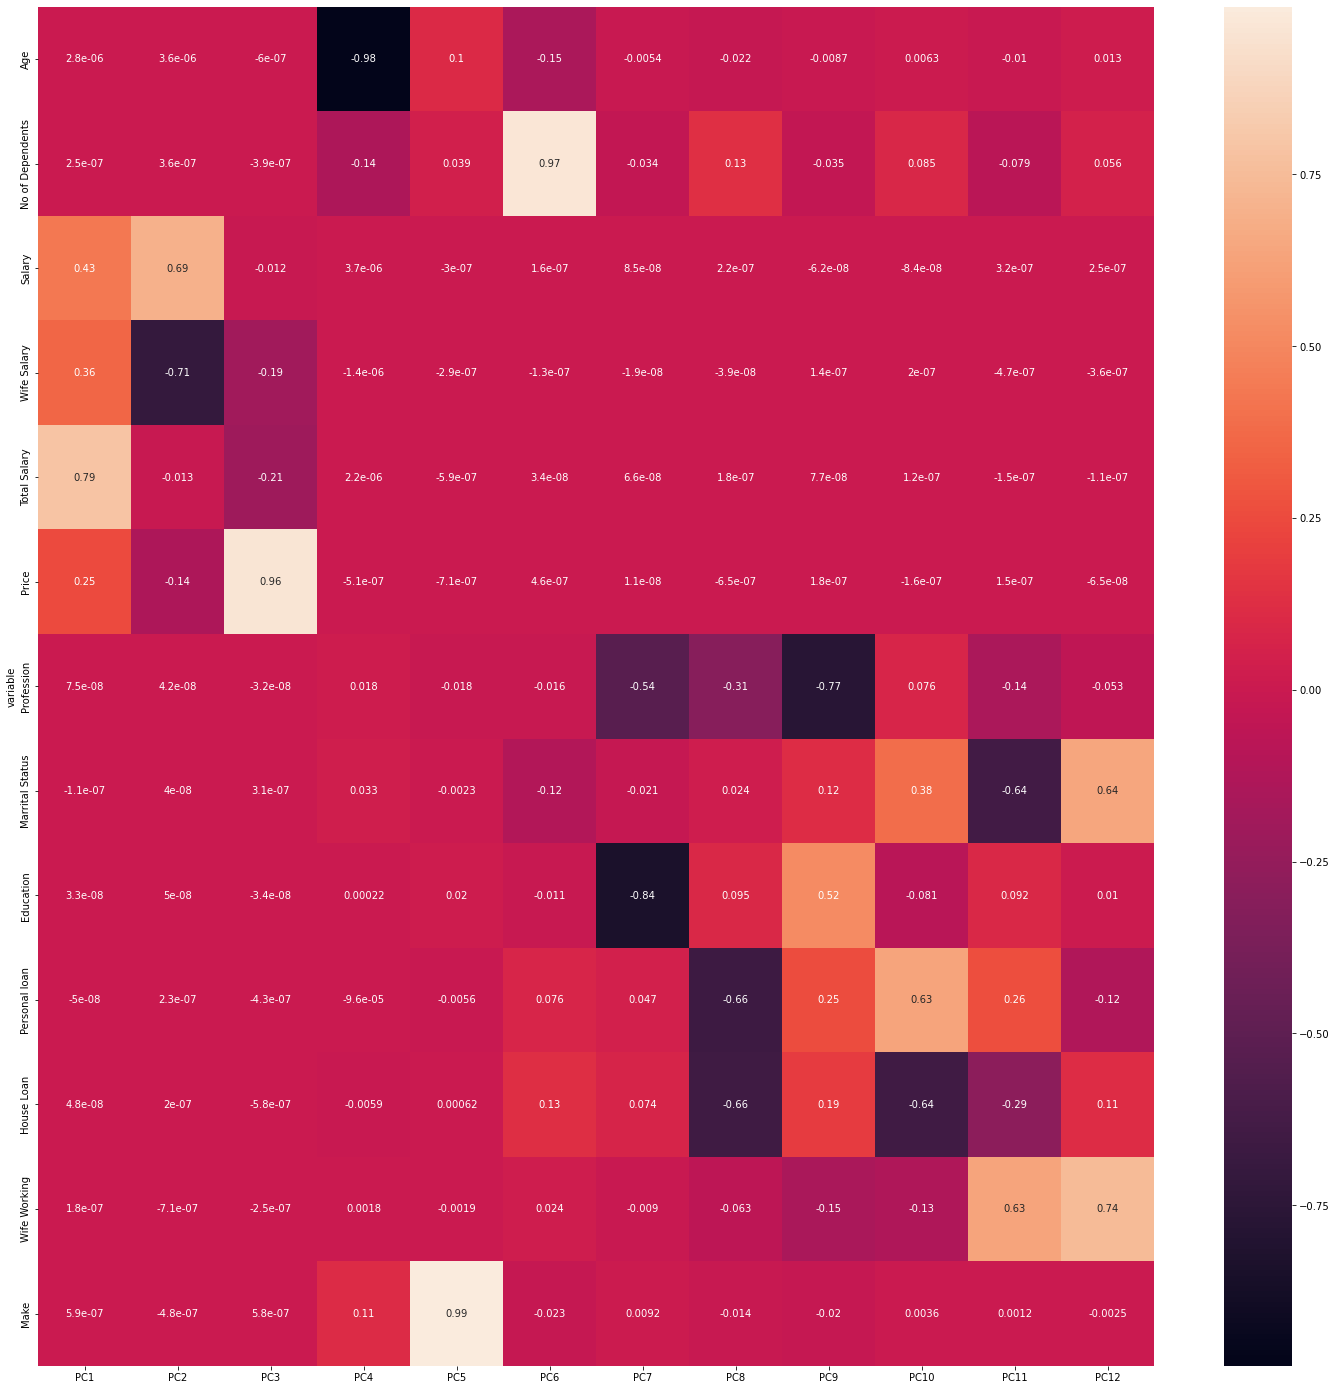

In [81]:
# Heat map for original variables and principal components
plt.rcParams['figure.figsize'] = (25,25)
ax = sns.heatmap(loadings_df, annot=True)
plt.show()

In [82]:
wcss=[]
for i in range(1,11):
    #preventing random initialization: 'init=k-means++'
    kmeans= KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

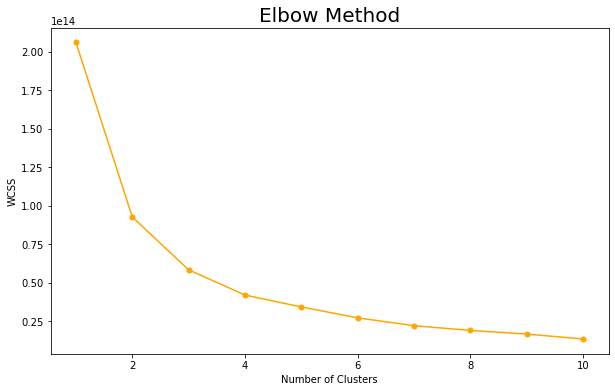

In [83]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss,color='orange', linestyle='solid', marker='o',
          markersize=5)
plt.title('Elbow Method', size=20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## Number of clusters = 4

In [84]:
kmeans3 = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans3.fit(X)
X['cluster'] = kmeans3.labels_
print(kmeans3.cluster_centers_)

[[3.19459459e+01 1.75675676e+00 1.17297297e+06 1.64864865e+05
  1.33783784e+06 8.57027027e+05 5.40540541e-01 3.51351351e-01
  5.67567568e-01 3.51351351e-01 2.70270270e-01 2.97297297e-01
  3.08108108e+00]
 [3.56153846e+01 2.15384615e+00 1.55769231e+06 8.84615385e+05
  2.44230769e+06 1.38846154e+06 7.30769231e-01 5.55111512e-17
  5.38461538e-01 1.92307692e-01 3.07692308e-01 1.00000000e+00
  3.88461538e+00]
 [4.09500000e+01 2.65000000e+00 2.34000000e+06 1.16415322e-10
  2.34000000e+06 1.18000000e+06 6.00000000e-01 1.00000000e-01
  5.50000000e-01 5.00000000e-01 6.00000000e-01 0.00000000e+00
  3.40000000e+00]
 [4.22000000e+01 2.53333333e+00 2.65333333e+06 1.58666667e+06
  4.24000000e+06 1.74000000e+06 8.00000000e-01 0.00000000e+00
  6.66666667e-01 2.00000000e-01 4.00000000e-01 1.00000000e+00
  4.46666667e+00]]


In [85]:
# Cluster size for the 3 clusters
from collections import Counter
Counter(kmeans3.labels_)

Counter({0: 37, 1: 26, 2: 20, 3: 15})

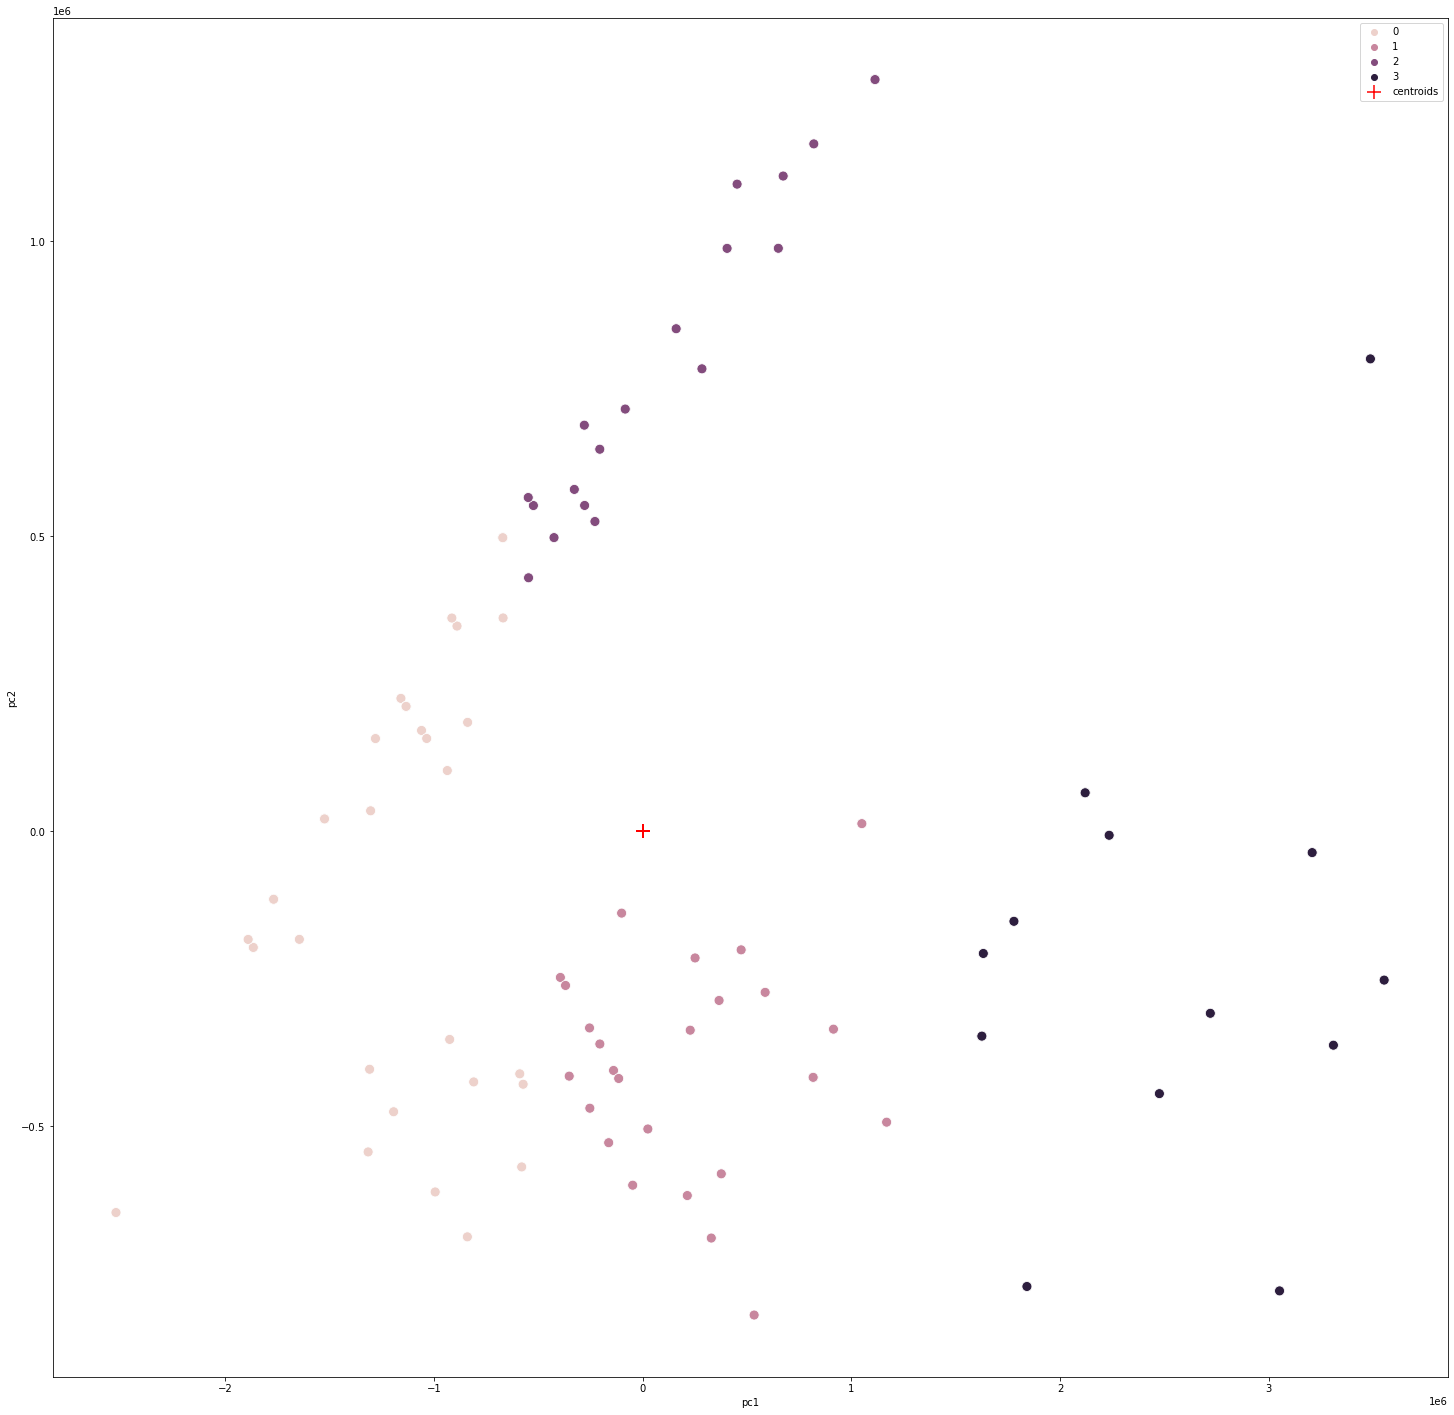

In [86]:
# Visulazing clusters
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans3.labels_,s = 100)
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], 
          marker="+", c="r", s=200, label="centroids")
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


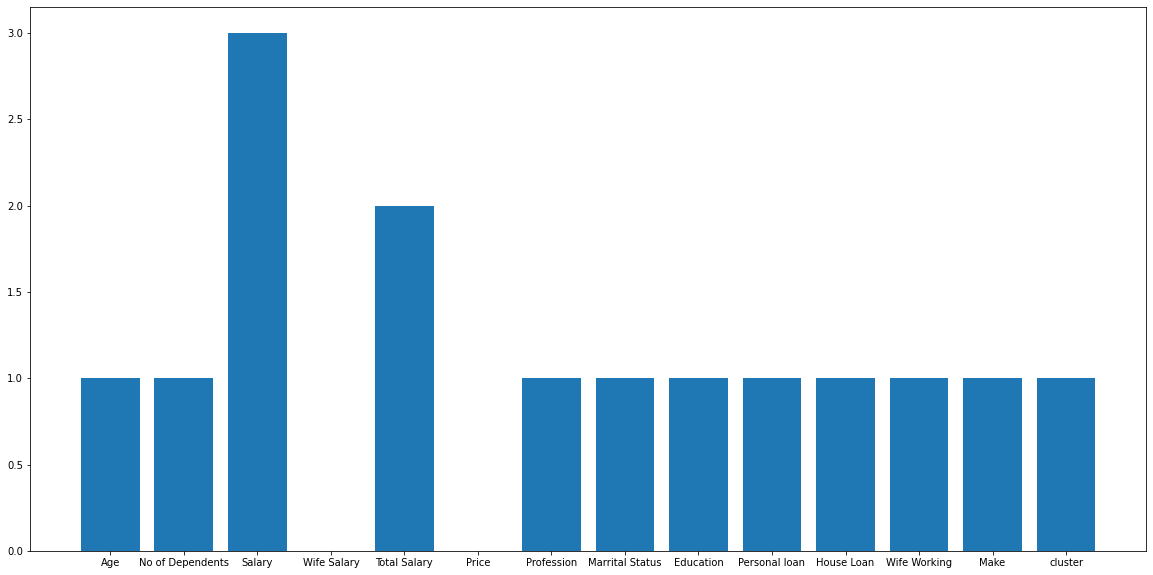

In [87]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy as shc
from sklearn.metrics import pairwise_distances
clust2 = AgglomerativeClustering(n_clusters = 4).fit_predict(pairwise_distances(X.transpose()))
plt.figure(figsize = (20,10))
plt.bar(X.columns,clust2)
plt.show()

From this bar graph we have 4 segments:                                                                                      
Segment0 = Wife salary, Price                                                                                                
Segment1 = Age, No of dependants, Profession, Marritial Status, Education, Personal Loan, House Loan, Wife Working, Make,              cluster                                                                                                             
Segment 2 =Total Salary                                                                                                      
Segment 3 = Salary

Salary forms the major contributor in Purchasing Car.

In [88]:
# X.head()

In [89]:
df3['Clusters'] = X['cluster']

In [91]:
newdf = df3.groupby('Clusters')

In [92]:
newdf.get_group(0)

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Clusters
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,0
5,28,Salaried,Married,Graduate,3,Yes,Yes,No,900000,0,900000,Baleno,700000,0
6,31,Salaried,Married,Graduate,4,No,No,Yes,1200000,600000,1800000,City,1200000,0
7,33,Business,Married,Post Graduate,4,No,No,No,1400000,0,1400000,Baleno,700000,0
9,34,Salaried,Married,Graduate,3,Yes,Yes,Yes,1200000,700000,1900000,i20,800000,0
12,29,Salaried,Married,Post Graduate,0,No,No,Yes,900000,800000,1700000,Verna,110000,0
13,30,Business,Single,Post Graduate,2,Yes,No,No,1400000,0,1400000,i20,800000,0
14,31,Business,Married,Graduate,3,Yes,Yes,Yes,900000,400000,1300000,Baleno,700000,0
16,26,Salaried,Single,Post Graduate,0,No,No,No,800000,0,800000,i20,800000,0
17,27,Salaried,Single,Graduate,0,Yes,No,Yes,800000,0,800000,Baleno,700000,0


In [93]:
cluster0 = newdf.get_group(0)

In [94]:
cluster0

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Clusters
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,0
5,28,Salaried,Married,Graduate,3,Yes,Yes,No,900000,0,900000,Baleno,700000,0
6,31,Salaried,Married,Graduate,4,No,No,Yes,1200000,600000,1800000,City,1200000,0
7,33,Business,Married,Post Graduate,4,No,No,No,1400000,0,1400000,Baleno,700000,0
9,34,Salaried,Married,Graduate,3,Yes,Yes,Yes,1200000,700000,1900000,i20,800000,0
12,29,Salaried,Married,Post Graduate,0,No,No,Yes,900000,800000,1700000,Verna,110000,0
13,30,Business,Single,Post Graduate,2,Yes,No,No,1400000,0,1400000,i20,800000,0
14,31,Business,Married,Graduate,3,Yes,Yes,Yes,900000,400000,1300000,Baleno,700000,0
16,26,Salaried,Single,Post Graduate,0,No,No,No,800000,0,800000,i20,800000,0
17,27,Salaried,Single,Graduate,0,Yes,No,Yes,800000,0,800000,Baleno,700000,0


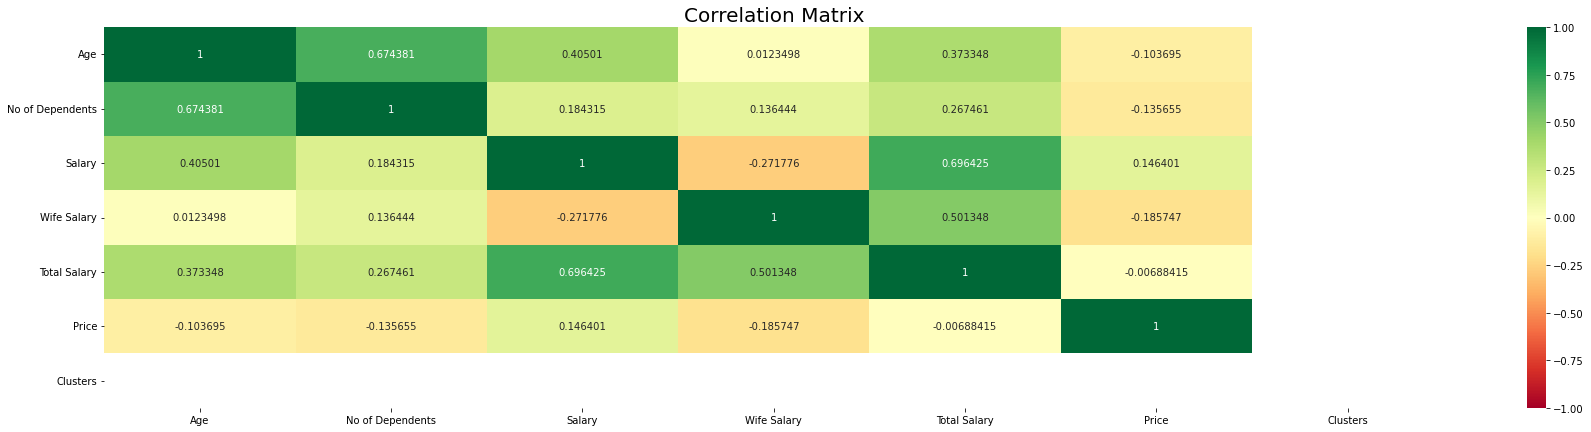

In [95]:
# Correlation Matrix Plotting
plt.figure(figsize=(30,7)) 
plt.title("Correlation Matrix", fontsize=20)
sns.heatmap(cluster0.corr(),cmap='RdYlGn',annot=True,vmax=1.0,vmin=-1.0,fmt='g')  
#cmap is the color for heatmap, annot=True is to show the correlation matrix value on heatmap
#vmax and vmin are the threshold for the heatmap and fmt will create a scale
plt.show()

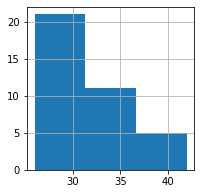

In [96]:
plt.figure(figsize=(3, 3))
hist = cluster0['Age'].hist(bins=3) 
plt.show()

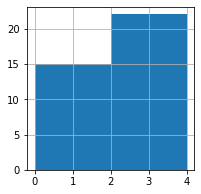

In [97]:
plt.figure(figsize=(3, 3))
hist = cluster0['No of Dependents'].hist(bins=2) 
plt.show()

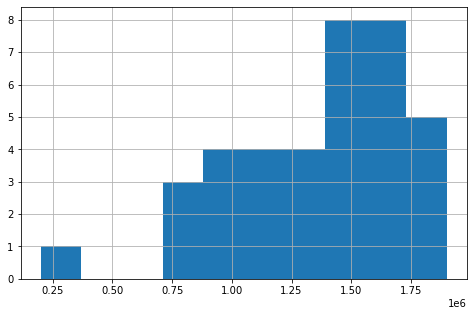

In [98]:
plt.figure(figsize=(8, 5))
hist = cluster0['Total Salary'].hist(bins=10) 
plt.show()

People from age group 25-31 with no of dependants > 2 and salary between 13lakhs and 17 lakhs are buying cars

## Technographic Segmentation

In [99]:
df4 = pd.read_excel('data4.xlsx')

In [100]:
df4.head()

,Sl No,Vehicle Class,Total Registered on VAHAN
0,1,Adapted Vehicle,76
1,2,Agricultural Tractor,8
2,3,Articulated Vehicle,6
3,4,Bus,1679
4,5,Camper Van,1


In [101]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Sl No                      25 non-null     int64 
 1   Vehicle Class              25 non-null     object
 2   Total Registered on VAHAN  25 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 728.0+ bytes


In [102]:
df4.shape

(25, 3)

In [103]:
df4.isnull().any()

Sl No                        False
Vehicle Class                False
Total Registered on VAHAN    False
dtype: bool

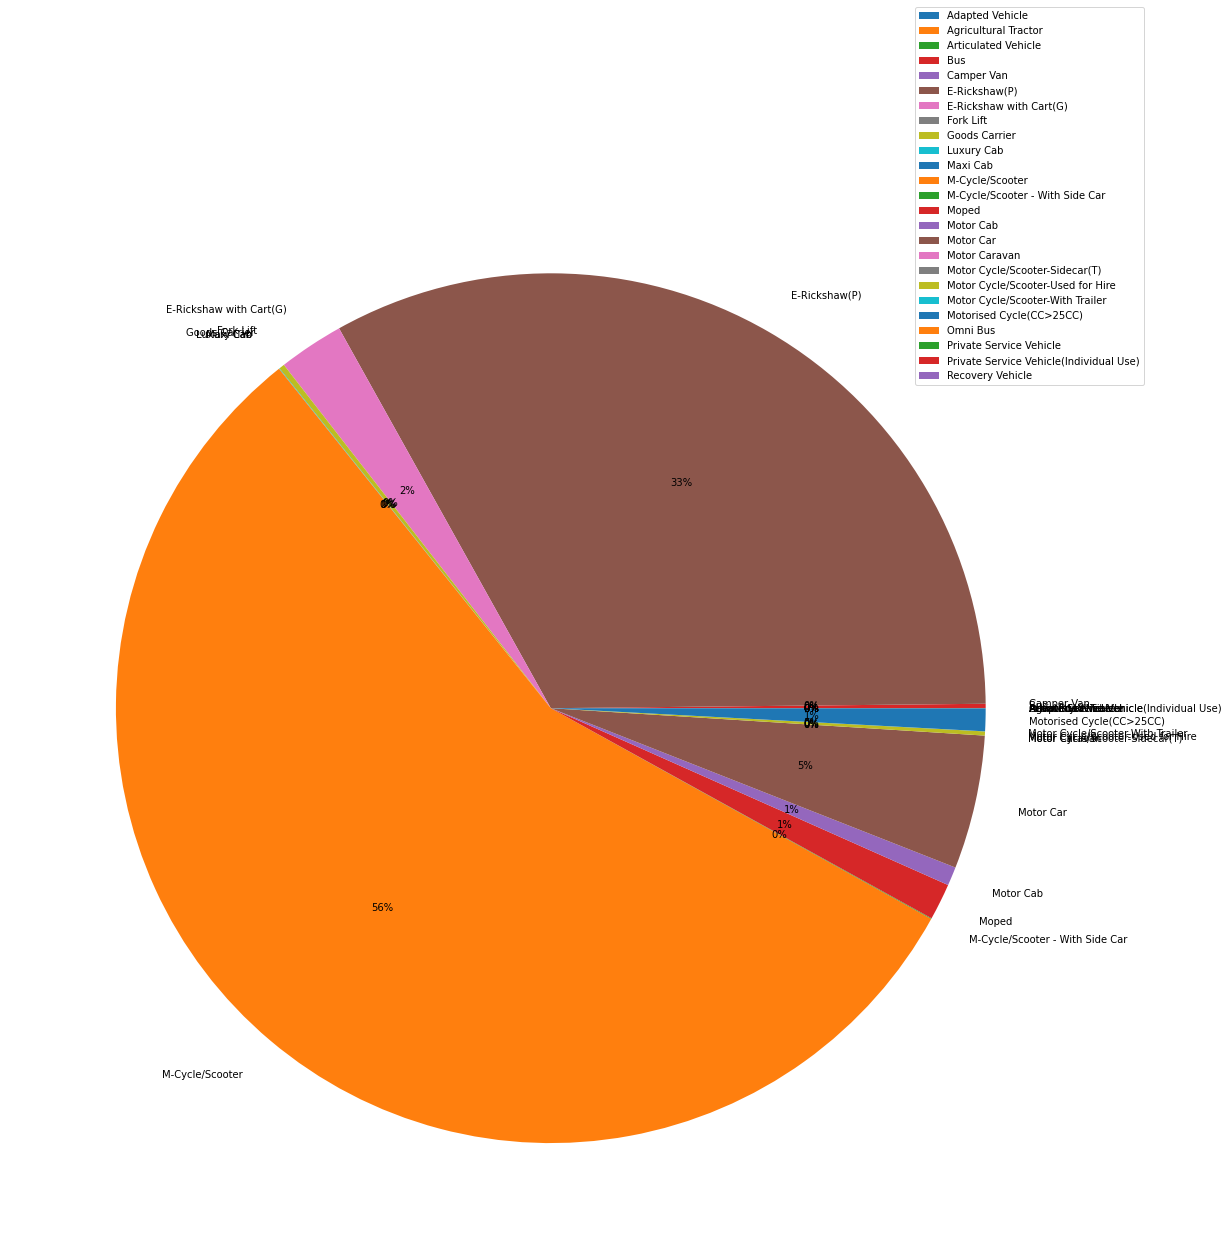

In [104]:
plt.figure(figsize = (20,20))
plt.pie(df4['Total Registered on VAHAN'], labels=df4['Vehicle Class'], autopct='%.0f%%')
plt.legend( loc ="upper right", bbox_to_anchor =(1.05, 1.15))
plt.show()

In [105]:
df4.sort_values(['Total Registered on VAHAN'], ascending=False).head(5)

,Sl No,Vehicle Class,Total Registered on VAHAN
11,12,M-Cycle/Scooter,609864
5,6,E-Rickshaw(P),357331
15,16,Motor Car,53894
6,7,E-Rickshaw with Cart(G),26315
13,14,Moped,14757


Most of the electric vehicles are registered in M-Cycle/Scooter category, E-Rickshaw and Car.

## Geographic Segmentation

In [106]:
df5 = pd.read_csv('data5.csv', encoding='cp1252')

In [107]:
df5

,Sl. No,Category,Expressways/Highways,EV Charging Stations Sanctioned
0,1,Expressways,Mumbai - Pune,10
1,2,Expressways,Ahmadabad - Vadodara,10
2,3,Expressways,Delhi Agra Yamuna,20
3,4,Expressways,Bengaluru Mysore,14
4,5,Expressways,Bangaluru-Chennai,30
5,6,Expressways,Surat-Mumbai,30
6,7,Expressways,Agra-Lucknow,40
7,8,Expressways,Eastern Peripheral (A),14
8,9,Expressways,Hyderabad ORR,16
9,1,Highways,Delhi - Srinagar,80


In [108]:
df5.drop(df5.tail().index,inplace=True)  # Removing last row

In [109]:
df5.columns

Index(['Sl. No', 'Category', 'Expressways/Highways',
       'EV Charging Stations Sanctioned'],
      dtype='object')

In [110]:
df5.sort_values(['EV Charging Stations Sanctioned'], ascending=False).head(5)

,Sl. No,Category,Expressways/Highways,EV Charging Stations Sanctioned
10,2,Highways,Delhi – Kolkata,160
13,5,Highways,Mumbai - Delhi,124
18,10,Highways,Kolkata - Nagpur,120
20,12,Highways,Chennai-Bhubaneswar,120
16,8,Highways,Mumbai - Bengaluru,100


Highways are having highest number of EV charging stations

In [111]:
Expressway_df = df5.groupby('Category').get_group('Expressways')
Expressway_df

,Sl. No,Category,Expressways/Highways,EV Charging Stations Sanctioned
0,1,Expressways,Mumbai - Pune,10
1,2,Expressways,Ahmadabad - Vadodara,10
2,3,Expressways,Delhi Agra Yamuna,20
3,4,Expressways,Bengaluru Mysore,14
4,5,Expressways,Bangaluru-Chennai,30
5,6,Expressways,Surat-Mumbai,30
6,7,Expressways,Agra-Lucknow,40
7,8,Expressways,Eastern Peripheral (A),14
8,9,Expressways,Hyderabad ORR,16


In [112]:
Expressway_df.drop(columns=['Category'], inplace=True)
Expressway_df.rename(columns = {'Expressways/Highways':'Expressway Name'}, inplace = True)
Expressway_df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Sl. No,Expressway Name,EV Charging Stations Sanctioned
0,1,Mumbai - Pune,10
1,2,Ahmadabad - Vadodara,10
2,3,Delhi Agra Yamuna,20
3,4,Bengaluru Mysore,14
4,5,Bangaluru-Chennai,30
5,6,Surat-Mumbai,30
6,7,Agra-Lucknow,40
7,8,Eastern Peripheral (A),14
8,9,Hyderabad ORR,16


In [113]:
Highway_df = df5.groupby('Category').get_group('Highways')

In [114]:
Highway_df.drop(columns=['Category'], inplace=True)
Highway_df.rename(columns = {'Expressways/Highways':'Highway Name'}, inplace = True)
Highway_df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Sl. No,Highway Name,EV Charging Stations Sanctioned
9,1,Delhi - Srinagar,80
10,2,Delhi – Kolkata,160
11,3,Agra - Nagpur,80
12,4,Meerut to GangotriDham,44
13,5,Mumbai - Delhi,124
14,6,Mumbai-Panaji,60
15,7,Mumbai - Nagpur,70
16,8,Mumbai - Bengaluru,100
17,9,Kolkata - Bhubaneswar,44
18,10,Kolkata - Nagpur,120


In [115]:
def plot_frequency(data,feature1,feature2,x_lbl,y_lbl,text,color):
    """
    This function helps to plot the bar plot for various features
    
    """
    new_df = data
    new = new_df.sort_values(by=[feature2],ascending=False) # sorting in descending order
    plt.figure(figsize=(14, 8))
    x_state = list(new[feature1].values) # defining x axis
    y_state = list(new[feature2].values) # defining y axis (count of numericl entity)
    plt.barh(x_state,y_state, color = color)
    plt.xlabel(x_lbl, fontsize=18) # xlabel
    plt.ylabel(y_lbl, fontsize=18) # ylabel
    plt.title(text, fontsize = 18)
    return plt.show()  

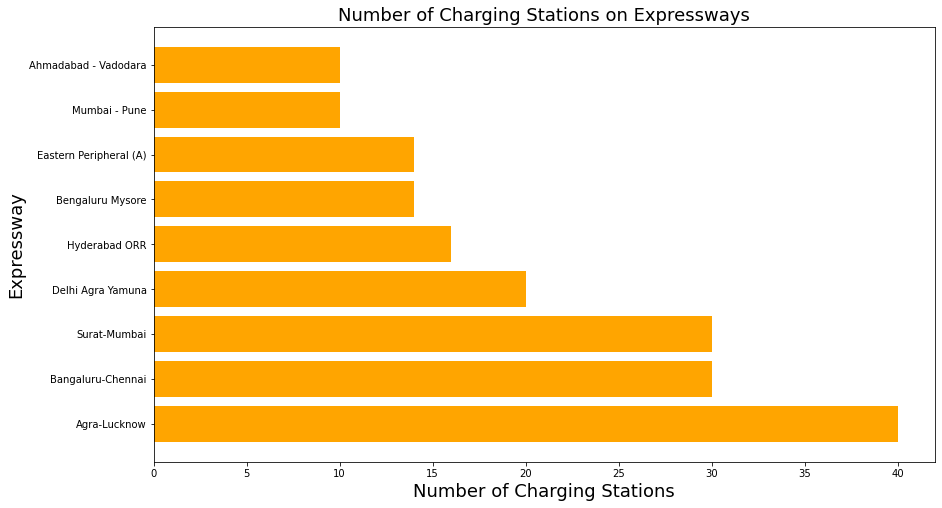

In [116]:
plot_frequency(Expressway_df,"Expressway Name","EV Charging Stations Sanctioned", "Number of Charging Stations",
               "Expressway","Number of Charging Stations on Expressways",'orange')

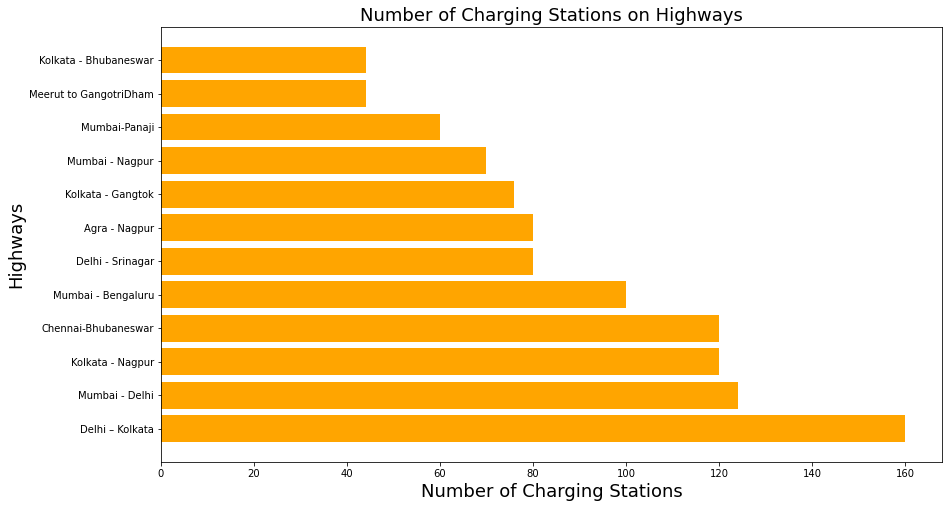

In [117]:
plot_frequency(Highway_df,"Highway Name","EV Charging Stations Sanctioned", "Number of Charging Stations",
               "Highways","Number of Charging Stations on Highways",'orange')